# Kiva Loan Data EDA and Analysis

### About Kiva
Kiva is an international nonprofit founded in 2005 with a mission to connect people through lending to alleviate poverty. In June 2018 Kiva was in 85 countries, had served 2.9 Million borrowers through USD 1.16 Billion worth of loans.

### How it works
1. A borrower applies for a loan (micro-finance partner, or Kiva directly).
2. The loan goes through the underwriting and approval process.
3. The loan is posted to Kiva for lenders to support, and a 30-day fundraising period begins.
4. Borrowers repay the loans.
* Note that Kiva does not collect interest on loans, and Kiva lenders do not receive interest from loans they support on Kiva. However, Field Partners collect interest from borrowers to cover their operation costs.

### About Kiva's Data
This analysis uses Kiva's Data Snapshot (https://build.kiva.org/docs/data/snapshots) downloaded on June 15th, 2018.

### Objectives of this Notebook
1. Conduct Exploratory Data Analysis
2. Question??

## Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline

In [2]:
df = pd.read_csv('data/loans.csv', parse_dates=['POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME'])
# import random
# df = pd.read_csv('data/loans.csv', skiprows=(lambda i: i>0 and random.random() < 0.01))

In [3]:
df.shape

(1419607, 34)

In [4]:
df.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL'],
      dtype='object')

In [5]:
# Drop columns we don't need
df = df.drop(['DESCRIPTION', 'DESCRIPTION_TRANSLATED','IMAGE_ID', 'VIDEO_ID', 'NUM_JOURNAL_ENTRIES', 'TAGS', 'NUM_BULK_ENTRIES', 'BORROWER_PICTURED'], axis=1)

In [6]:
df.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'FUNDED_AMOUNT',
       'LOAN_AMOUNT', 'STATUS', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL'],
      dtype='object')

In [7]:
df['diff_posted_planned'] = df['PLANNED_EXPIRATION_TIME'].sub(df['POSTED_TIME'], axis=0)
df['diff_posted_planned'] = df['diff_posted_planned'] / np.timedelta64(1, 'D')

In [8]:
df['diff_posted_raised'] = df['RAISED_TIME'].sub(df['POSTED_TIME'], axis=0)
df['diff_posted_raised'] = df['diff_posted_raised'] / np.timedelta64(1, 'D')

In [9]:
df.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,...,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,BORROWER_NAMES,BORROWER_GENDERS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,diff_posted_planned,diff_posted_raised
0,657307,Aivy,English,125.0,125.0,funded,General Store,Retail,to buy additional inventories for her sari-sa...,PH,...,2013-12-22 08:00:00,2014-01-15 04:48:22,7.0,3,Aivy,female,irregular,field_partner,30.046076,0.100428
1,657259,Idalia Marizza,Spanish,400.0,400.0,funded,Used Clothing,Clothing,"To buy American clothing such as blouses, shir...",HN,...,2013-12-20 08:00:00,2014-02-25 06:42:06,8.0,11,Idalia Marizza,female,monthly,field_partner,71.084572,41.429699
2,658010,Aasia,English,400.0,400.0,funded,General Store,Retail,"to buy stock of rice, sugar and flour",PK,...,2014-01-09 08:00:00,2014-01-24 23:06:18,14.0,16,Aasia,female,monthly,field_partner,30.400775,8.481481
3,659347,Gulmira,Russian,625.0,625.0,funded,Farming,Agriculture,"to buy cucumber and tomato seeds, as well as f...",KG,...,2014-01-17 08:00:00,2014-01-22 05:29:28,14.0,21,Gulmira,female,monthly,field_partner,31.715440,1.812269
4,656933,Ricky\t,English,425.0,425.0,funded,Farming,Agriculture,to buy organic fertilizer and agrochemical pr...,PH,...,2013-12-17 08:00:00,2014-01-14 17:29:27,7.0,15,Ricky\t,male,bullet,field_partner,30.016447,0.488264


In [10]:
# Empirical expiration time is about 103 days for direct loans
df[df['DISTRIBUTION_MODEL']=='direct']['diff_posted_planned'].mean()

103.09370720832506

In [11]:
# Empirical expiration time is about 37 days for field-partner loans
df[df['DISTRIBUTION_MODEL']=='field_partner']['diff_posted_planned'].mean()

36.69100024716611

In [12]:
# Average time (in days) it takes to fund direct loan
df[df['DISTRIBUTION_MODEL']=='direct']['diff_posted_raised'].mean()

46.93997493908382

In [13]:
# Average time (in days) it takes to fund field-partner loan
df[df['DISTRIBUTION_MODEL']=='field_partner']['diff_posted_raised'].mean()

12.210967399641726

In [14]:
# Checking for missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
diff_posted_planned,371834,0.261927
PLANNED_EXPIRATION_TIME,371834,0.261927
CURRENCY_EXCHANGE_COVERAGE_RATE,321526,0.226489
TOWN_NAME,161758,0.113946
RAISED_TIME,64282,0.045282
diff_posted_raised,64282,0.045282
BORROWER_NAMES,47558,0.033501
LOAN_NAME,47558,0.033501
LOAN_USE,43273,0.030482
BORROWER_GENDERS,43251,0.030467


In [15]:
df['REPAYMENT_INTERVAL'].value_counts(1)

monthly      0.548019
irregular    0.372953
bullet       0.078591
weekly       0.000438
Name: REPAYMENT_INTERVAL, dtype: float64

In [16]:
df['STATUS'].value_counts(1)

funded         0.951207
expired        0.041618
refunded       0.004634
fundRaising    0.002542
Name: STATUS, dtype: float64

In [17]:
df['DISTRIBUTION_MODEL'].value_counts(1)

field_partner    0.988173
direct           0.011827
Name: DISTRIBUTION_MODEL, dtype: float64

In [18]:
# Group vs Individual loans
# mask_g = df['BORROWER_GENDERS']!= 'male' & df['BORROWER_GENDERS'] != 'female'
df['GROUP'] = np.where(np.logical_and(df['BORROWER_GENDERS']!= 'male', df['BORROWER_GENDERS']!= 'female'), 1, 0)

In [19]:
df.head()

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,...,RAISED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,BORROWER_NAMES,BORROWER_GENDERS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,diff_posted_planned,diff_posted_raised,GROUP
0,657307,Aivy,English,125.0,125.0,funded,General Store,Retail,to buy additional inventories for her sari-sa...,PH,...,2014-01-15 04:48:22,7.0,3,Aivy,female,irregular,field_partner,30.046076,0.100428,0
1,657259,Idalia Marizza,Spanish,400.0,400.0,funded,Used Clothing,Clothing,"To buy American clothing such as blouses, shir...",HN,...,2014-02-25 06:42:06,8.0,11,Idalia Marizza,female,monthly,field_partner,71.084572,41.429699,0
2,658010,Aasia,English,400.0,400.0,funded,General Store,Retail,"to buy stock of rice, sugar and flour",PK,...,2014-01-24 23:06:18,14.0,16,Aasia,female,monthly,field_partner,30.400775,8.481481,0
3,659347,Gulmira,Russian,625.0,625.0,funded,Farming,Agriculture,"to buy cucumber and tomato seeds, as well as f...",KG,...,2014-01-22 05:29:28,14.0,21,Gulmira,female,monthly,field_partner,31.715440,1.812269,0
4,656933,Ricky\t,English,425.0,425.0,funded,Farming,Agriculture,to buy organic fertilizer and agrochemical pr...,PH,...,2014-01-14 17:29:27,7.0,15,Ricky\t,male,bullet,field_partner,30.016447,0.488264,0


## A closer look... Individual vs. Group loans

In [20]:
individual = df['GROUP']==0
group = df['GROUP']==1

In [21]:
df['GROUP'].value_counts(1)

0    0.827514
1    0.172486
Name: GROUP, dtype: float64

In [22]:
df[['FUNDED_AMOUNT', 'LOAN_AMOUNT', 'LENDER_TERM', 'NUM_LENDERS_TOTAL']][group].describe().T

,count,mean,std,min,25%,50%,75%,max
FUNDED_AMOUNT,244862.0,1572.803518,1547.925712,0.0,500.0,1000.0,2200.0,50000.0
LOAN_AMOUNT,244862.0,1620.683385,1590.533857,25.0,525.0,1050.0,2275.0,50000.0
LENDER_TERM,244859.0,11.285952,7.773717,2.0,8.0,9.0,13.0,195.0
NUM_LENDERS_TOTAL,244862.0,39.205495,39.841888,0.0,12.0,26.0,51.0,1643.0


In [23]:
df[['FUNDED_AMOUNT', 'LOAN_AMOUNT', 'LENDER_TERM', 'NUM_LENDERS_TOTAL']][individual].describe().T

,count,mean,std,min,25%,50%,75%,max
FUNDED_AMOUNT,1174745.0,634.235817,800.796063,0.0,250.0,450.0,800.0,100000.0
LOAN_AMOUNT,1174745.0,667.884115,852.682818,25.0,275.0,475.0,825.0,100000.0
LENDER_TERM,1174724.0,13.419373,7.470425,1.0,8.0,13.0,14.0,158.0
NUM_LENDERS_TOTAL,1174745.0,18.720526,22.998699,0.0,8.0,13.0,24.0,3045.0


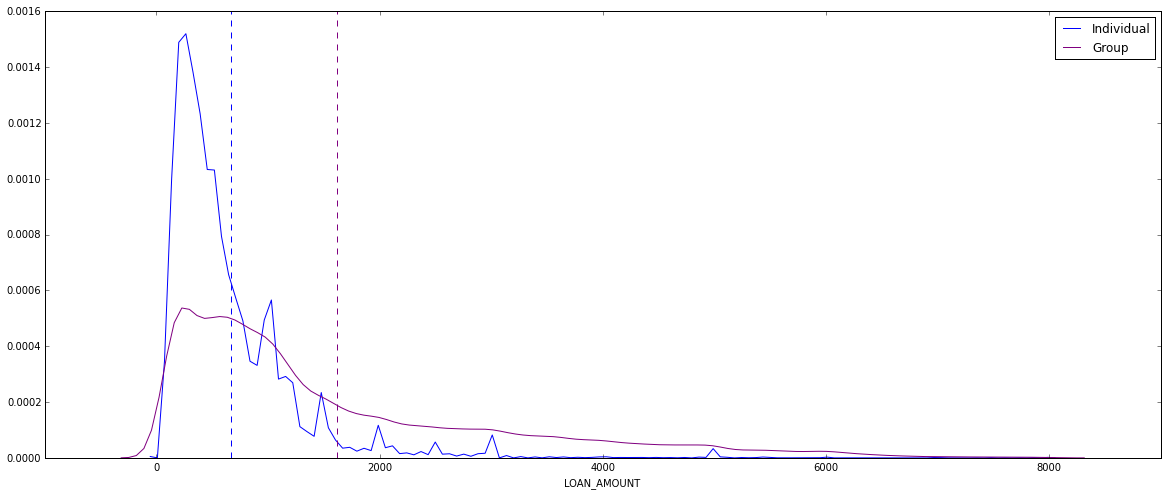

In [24]:
# Distribution by group
plt.figure(figsize=(20,8))
sns.distplot(df[individual]['LOAN_AMOUNT'], hist=False, color='blue', label = 'Individual', kde_kws={'clip': (0, 8000)})
sns.distplot(df[group]['LOAN_AMOUNT'], hist=False, color='purple', label = 'Group', kde_kws={'clip': (0, 8000)});
plt.axvline(df[individual]['LOAN_AMOUNT'].mean(), color="blue", linestyle="--")
plt.axvline(df[group]['LOAN_AMOUNT'].mean(), color="purple", linestyle="--")

plt.legend();

In [48]:
# H0: mu_group - mu_individual = 0
# Ha: mu_group - mu_induvidual != 0

# alpha = 0.05

# T test
t, p = sts.ttest_ind(df[individual]['LOAN_AMOUNT'], df[group]['LOAN_AMOUNT'], equal_var=False)

# p value
print("p-value: {:2.2f}".format(p))

p-value: 0.00


## Individual loans, by gender

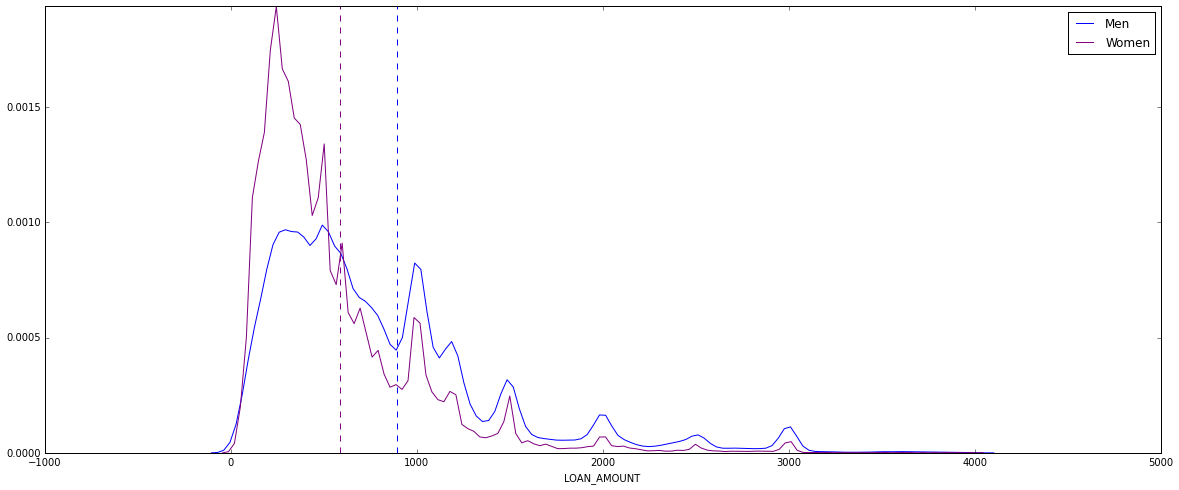

In [25]:
# Individual loan splitup by gender
male = df['BORROWER_GENDERS']=='male'
female = df['BORROWER_GENDERS']=='female'

plt.figure(figsize=(20,8))
sns.distplot(df[male]['LOAN_AMOUNT'], hist=False, color='blue', label = 'Men', kde_kws={'clip': (0, 4000)});
sns.distplot(df[female]['LOAN_AMOUNT'], hist=False, color='purple', label = 'Women', kde_kws={'clip': (0, 4000)});
plt.axvline(df[male]['LOAN_AMOUNT'].mean(), color="blue", linestyle="--")
plt.axvline(df[female]['LOAN_AMOUNT'].mean(), color="purple", linestyle="--")
plt.legend();

In [26]:
# H0: mu_group - mu_individual = 0
# Ha: mu_group - mu_induvidual != 0

# alpha = 0.05

# T test
t, p = sts.ttest_ind(df[male]['LOAN_AMOUNT'], df[female]['LOAN_AMOUNT'], equal_var=False)

# p value
print("p-value: {:2.2f}".format(p))

p-value: 0.00


### Question: Is there gender inequality in access to microfinance?
Possible approach to a response: Assuming the average loan amounts are a viable proxy for gender inequality in micro-finance, we can run t-tests to see if there are significant differences between men and women's average individual loan amount by country.

In [27]:
# Step 1: State the null and alternative hypotheses
# H0: mu_male - mu_female = 0
# Ha: mu_male - mu_female != 0

# Step 2: Significance level: 
alpha = 0.05

# Steps 3 and 4: Compute t-tests and p-values
d = {}
for country in set(df['COUNTRY_NAME']):
    t, p = sts.ttest_ind(df[male & (df['COUNTRY_NAME'] == country)]['LOAN_AMOUNT'], df[female & (df['COUNTRY_NAME'] == country)]['LOAN_AMOUNT'], equal_var=False)
    d[country] = (p <= alpha)
d

# Step 5: Compare the p-value to alpha and decide.
# True: reject H0 that there is no difference between men and women.

//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'Afghanistan': True,
 'Albania': True,
 'Armenia': True,
 'Azerbaijan': False,
 'Belize': False,
 'Benin': True,
 'Bhutan': False,
 'Bolivia': False,
 'Bosnia and Herzegovina': False,
 'Botswana': False,
 'Brazil': False,
 'Bulgaria': False,
 'Burkina Faso': True,
 'Burundi': False,
 'Cambodia': True,
 'Cameroon': False,
 'Canada': False,
 'Chad': False,
 'Chile': False,
 'China': False,
 'Colombia': True,
 'Congo': False,
 'Costa Rica': True,
 "Cote D'Ivoire": False,
 'Dominican Republic': True,
 'Ecuador': True,
 'Egypt': True,
 'El Salvador': True,
 'Gaza': False,
 'Georgia': True,
 'Ghana': True,
 'Guam': False,
 'Guatemala': False,
 'Haiti': True,
 'Honduras': True,
 'India': True,
 'Indonesia': True,
 'Iraq': False,
 'Israel': False,
 'Jordan': True,
 'Kenya': True,
 'Kosovo': True,
 'Kyrgyzstan': True,
 "Lao People's Democratic Republic": False,
 'Lebanon': True,
 'Lesotho': False,
 'Liberia': True,
 'Madagascar': False,
 'Malawi': True,
 'Mali': False,
 'Mauritania': False,
 '

## More EDA to look for other interesting questions...

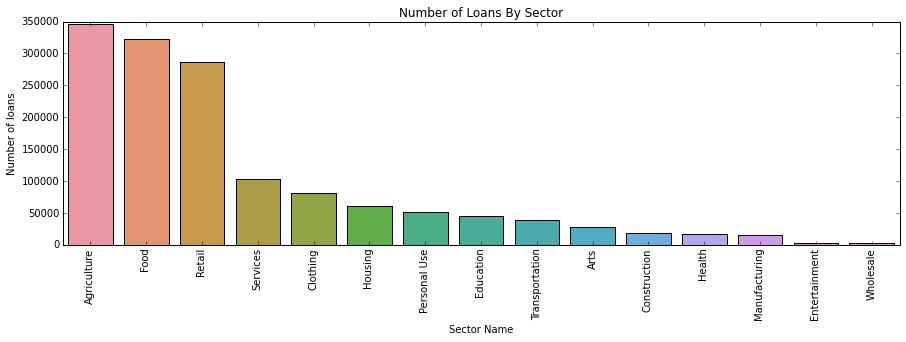

In [28]:
# Count Plot by Sector
plt.figure(figsize=(15,4))
sns.countplot(x='SECTOR_NAME', data=df, orient='h', order = df['SECTOR_NAME'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Number of loans')
plt.xlabel('Sector Name')
plt.title("Number of Loans By Sector");

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


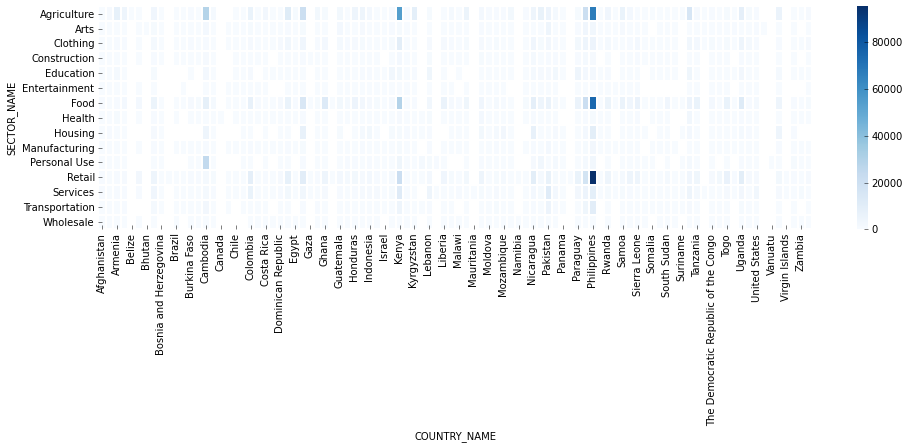

In [29]:
# Calculate correlations
# df[['SECTOR_NAME', 'COUNTRY_NAME']]

# Heatmap

def count_rows(x):
    return len(x)

g = df.groupby(['SECTOR_NAME','COUNTRY_NAME']).apply(count_rows).unstack()
plt.figure(figsize=(16,4))
sns.heatmap(g, cmap='Blues', linewidth=0.5);

In [30]:
# By Activity
df['ACTIVITY_NAME'].value_counts(1).head(10)

Farming                      0.093346
General Store                0.088298
Retail                       0.049494
Food Production/Sales        0.045747
Clothing Sales               0.041452
Agriculture                  0.041236
Personal Housing Expenses    0.040132
Pigs                         0.031814
Grocery Store                0.029673
Fruits & Vegetables          0.025896
Name: ACTIVITY_NAME, dtype: float64

## Model: Field Partners vs. Direct

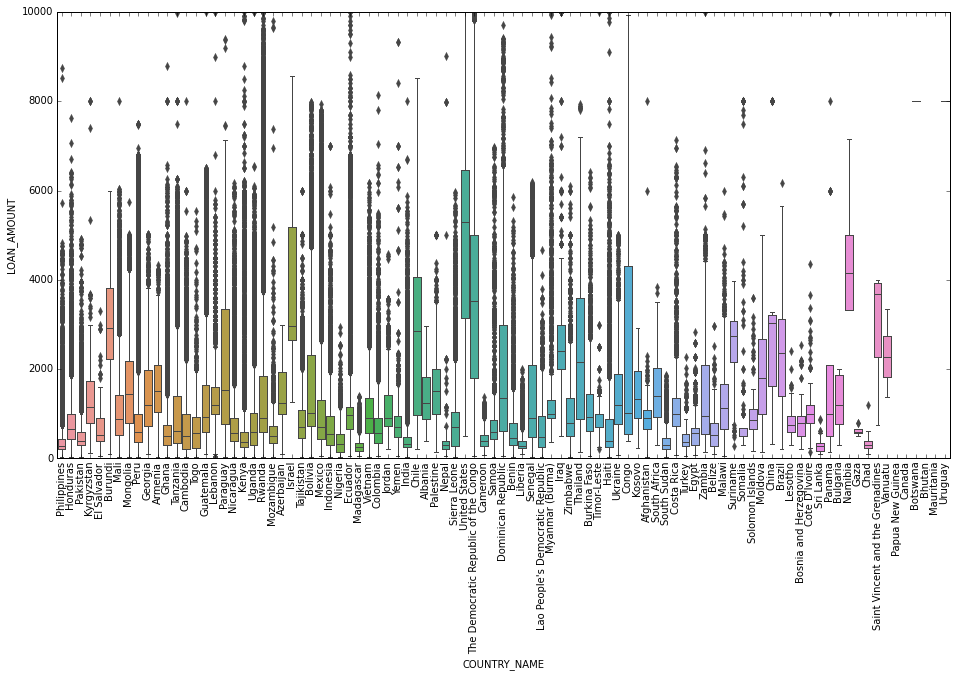

In [31]:
# Field Partners
plt.figure(figsize=(16,8))
sns.boxplot(x='COUNTRY_NAME', y='LOAN_AMOUNT', data=df[df['DISTRIBUTION_MODEL']=='field_partner'])
plt.xticks(rotation='vertical')
plt.ylim(0,10000);

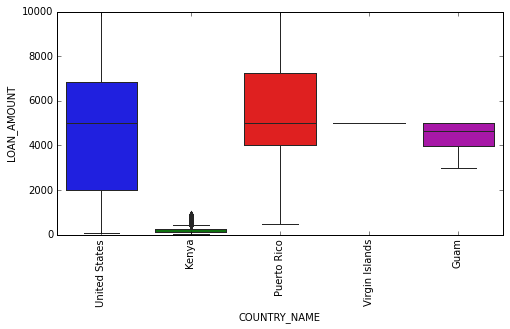

In [32]:
# Direct
plt.figure(figsize=(8,4))
sns.boxplot(x='COUNTRY_NAME', y='LOAN_AMOUNT', data=df[df['DISTRIBUTION_MODEL']=='direct'])
plt.xticks(rotation='vertical');
plt.ylim(0,10000);

In [33]:
g_country = df.groupby('COUNTRY_NAME')
g_country['LOAN_AMOUNT'].sum().sort_values(ascending=False).head(10)

COUNTRY_NAME
Philippines      97984600.0
Peru             79437775.0
Kenya            66735975.0
Paraguay         53964700.0
Cambodia         51613525.0
United States    46352000.0
Bolivia          44226725.0
El Salvador      41691550.0
Tajikistan       39622125.0
Uganda           38386500.0
Name: LOAN_AMOUNT, dtype: float64

In [34]:
df.sort_values?

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


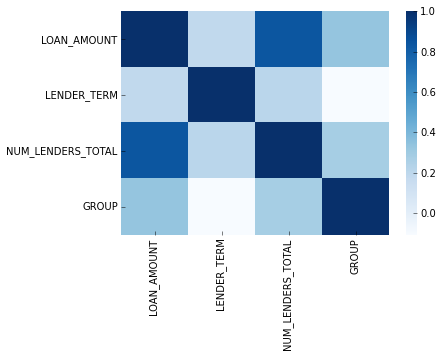

In [35]:
import seaborn as sns
corr = df[['LOAN_AMOUNT', 'LENDER_TERM', 'NUM_LENDERS_TOTAL', 'GROUP']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='Blues')

In [36]:
df[male].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN_ID,299091.0,684517.753299,400897.489946,84.000000,350143.500000,650220.000000,1.016290e+06,1.444083e+06
FUNDED_AMOUNT,299091.0,818.416335,1037.565375,0.000000,350.000000,600.000000,1.000000e+03,1.000000e+05
LOAN_AMOUNT,299091.0,893.585146,1117.962983,25.000000,375.000000,650.000000,1.075000e+03,1.000000e+05
CURRENCY_EXCHANGE_COVERAGE_RATE,213822.0,0.118312,0.038677,0.100000,0.100000,0.100000,1.000000e-01,2.000000e-01
PARTNER_ID,295787.0,147.958068,84.742979,1.000000,88.000000,138.000000,1.770000e+02,5.560000e+02
LENDER_TERM,299089.0,15.338525,8.194908,1.000000,11.000000,14.000000,1.700000e+01,1.540000e+02
NUM_LENDERS_TOTAL,299091.0,23.949253,29.123014,0.000000,10.000000,18.000000,3.000000e+01,2.964000e+03
diff_posted_planned,216612.0,38.170920,37.332793,15.000590,32.249971,34.693634,3.826752e+01,1.682236e+03
diff_posted_raised,269390.0,16.413751,15.546183,-381.029803,4.907778,11.818576,2.748916e+01,4.018420e+02
GROUP,299091.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [37]:
df[female].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LOAN_ID,875654.0,735412.357246,421467.392371,88.000000,369309.250000,744428.500000,1.103760e+06,1.444085e+06
FUNDED_AMOUNT,875654.0,571.326568,690.695194,0.000000,250.000000,400.000000,7.000000e+02,1.000000e+05
LOAN_AMOUNT,875654.0,590.792996,724.683796,25.000000,250.000000,425.000000,7.250000e+02,1.000000e+05
CURRENCY_EXCHANGE_COVERAGE_RATE,682705.0,0.115547,0.036235,0.100000,0.100000,0.100000,1.000000e-01,2.000000e-01
PARTNER_ID,862627.0,146.752978,82.683943,1.000000,106.000000,144.000000,1.640000e+02,5.570000e+02
LENDER_TERM,875635.0,12.763851,7.088230,1.000000,8.000000,12.000000,1.400000e+01,1.580000e+02
NUM_LENDERS_TOTAL,875654.0,16.934586,20.183729,0.000000,7.000000,12.000000,2.100000e+01,3.045000e+03
diff_posted_planned,649053.0,37.726567,27.712349,15.001146,32.356238,34.678472,3.804588e+01,1.682307e+03
diff_posted_raised,850789.0,11.146252,13.949701,-381.029803,3.162384,6.734363,1.500288e+01,5.337236e+02
GROUP,875654.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


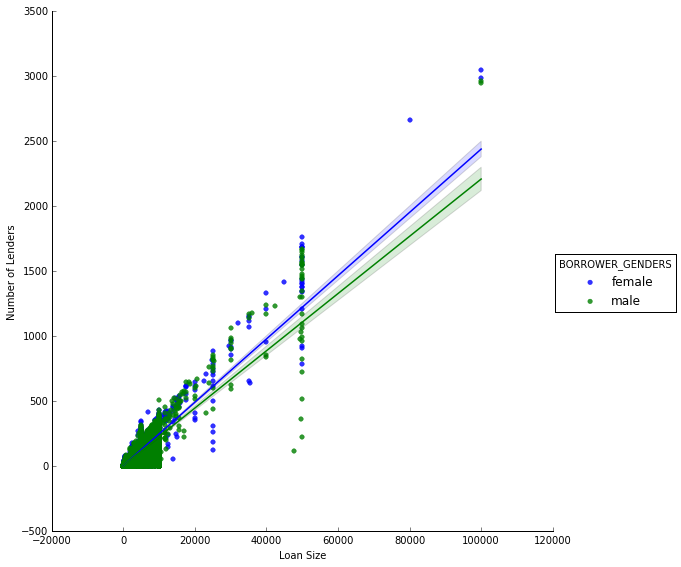

In [44]:
g = sns.lmplot(x="LOAN_AMOUNT", y="NUM_LENDERS_TOTAL", hue = 'BORROWER_GENDERS',
               truncate=True, size=8, data=df[individual])
g.set_axis_labels("Loan Size", "Number of Lenders");

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


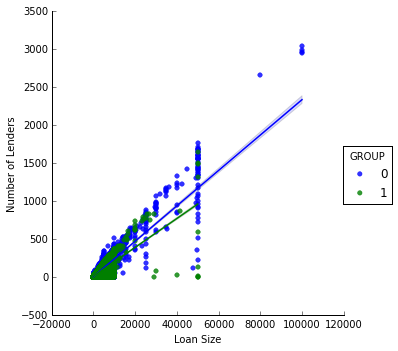

In [45]:
g = sns.lmplot(x="LOAN_AMOUNT", y="NUM_LENDERS_TOTAL", hue='GROUP',
               truncate=True, size=5, data=df)
g.set_axis_labels("Loan Size", "Number of Lenders");

Other questions?